# FoodHub Data Analysis


#**Group 2**
**1.Marilyn Sedem Naayo  
2.Vivian Nyarkoa Ofori  
3.Esther Aryeetey  
4.Elsie Funkor  
5.Louisa Ama Bo Johnson**

### Problem Statement / Business Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Import your data

In [12]:
ls

drive/  sample_data/


In [25]:
cd drive

/content/drive


In [28]:
ls

MyDrive/


In [29]:
cd MyDrive

/content/drive/MyDrive


In [30]:
ls

 20230326_203327.jpg                                          PROFILE.gdoc
 -6028587663885449643_109.jpg                                 Profile.gslides
 Bloossom/                                                   'progress report -1.gdoc'
'Carl EM.gdoc'                                               'progress report Cc-1.gdoc'
'Colab Notebooks'/                                            Report.gdoc
'Contact Information.gform'                                  'ULTRA-VIOLET RADIATION (1).gslides'
'EM THEORY PROJECT REPORT 2.gdoc'                             Unorganized/
 Esther_ALX_AiCE_Folder/                                     'Untitled document (10).gdoc'
'Esther Aryeetey-4655018.gdoc'                               'Untitled document (11).gdoc'
'Esther Aryeetey-Challenge.ipynb'                            'Untitled document (1).gdoc'
'Esther Aryeetey_CV.pdf'                                     'Untitled document (2).gdoc'
'Esther Aryeetey.docx.pdf'                                   '

In [32]:
cd Bloossom

/content/drive/MyDrive/Bloossom


In [33]:
cd Data Science

/content/drive/MyDrive/Bloossom/Data Science


In [36]:
#Importing  Data form foodhub.csv into a DataFrame, 'df'
df = pd.read_csv('/content/drive/MyDrive/Bloossom/Data Science/Data Analysis 1/foodhub_order.csv')

### Do sanity checks on the data

In [37]:
#Viewing dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [15]:
#display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 10249 entries, {"cells":[{"cell_type":"markdown" to nbformat_minor:0}
dtypes: object(10249)
memory usage: 0.0+ bytes


In [16]:
#Checking for null values of the entire dataset(the total)
missing_values = df.isnull().sum().sum()
missing_values

0.0

In [17]:
#Checking the data types
df.dtypes

{"cells":[{"cell_type":"markdown"        object
metadata:{"id":"Gc8x8QimJY_H"}           object
source:["# FoodHub Data Analysis\n"]}    object
{"cell_type":"markdown"                  object
source:["#**Group 2**\n"                 object
                                          ...  
nbconvert_exporter:"python"              object
pygments_lexer:"ipython3"                object
version:"3.11.4"}}                       object
nbformat:4                               object
nbformat_minor:0}                        object
Length: 10249, dtype: object

#Checking for unique values
**Unique value checks for each column necessary**

In [42]:
#Check for unique values
restaurant_counts = df['restaurant_name'].value_counts()
restaurant_counts

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [43]:
df['cuisine_type'].unique( )

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [44]:
df['day_of_the_week'].unique( )

array(['Weekend', 'Weekday'], dtype=object)

In [45]:
ratings=df['rating'].unique()
ratings

array(['Not given', '5', '3', '4'], dtype=object)

In [46]:
#Defining valid ratings
valid_ratings = ratings[1:]
valid_ratings


array(['5', '3', '4'], dtype=object)

In [47]:
# Checking for duplicates
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [48]:
#checking the total number of different restaurants
diff_restaurants = df.drop_duplicates(subset = 'restaurant_name').value_counts().sum()
diff_restaurants

178

In [49]:
#dropping duplicates
dropped = df.drop_duplicates(subset = 'restaurant_name')
dropped


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1781,1477149,102710,Rye House,American,12.13,Weekday,4,26,30
1790,1477343,101957,Hiroko's Place,Japanese,13.05,Weekend,Not given,32,27
1820,1477910,39702,Frank Restaurant,Italian,12.08,Weekday,4,20,31
1840,1476843,361846,Sarabeth's West,American,14.12,Weekday,3,21,33


In [50]:
#confirming with nuique () method
df[['restaurant_name']].nunique()


restaurant_name    178
dtype: int64

In [51]:
 #Statistical summary
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


## Questions for guidance.
The questions or tasks below are meant to guide you to extract insight for the business. You are encourage to ask more questions.


### **Question 1:** How many orders are not rated?

In [52]:
#ratings not given
rating_not_given = df[df['rating']== 'Not given' ].value_counts()
rating_not_given

order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.18              Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.18              Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.79              Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.12              Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.12              Weekend          Not given  29                     30               1
                                                                                                         

In [53]:
#Number of orders not rated
rating_not_given.value_counts().sum()

736

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 2:** Explore all the variables and provide observations on their distributions. (Choose appropriate plots as you wish)

# Histograms for numeric variables


In [54]:
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

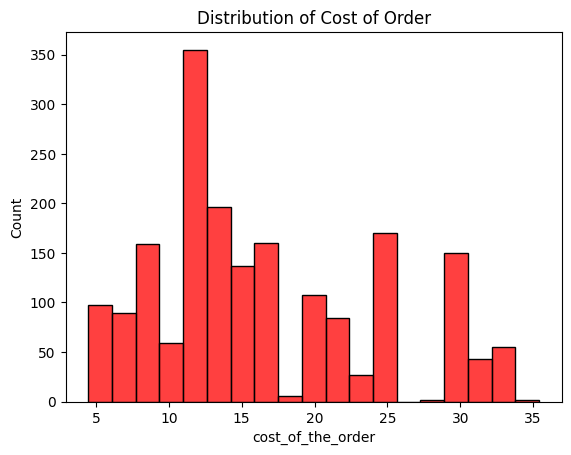

In [55]:
#Distribution of Cost of order

plt.subplot()
sns.histplot(df['cost_of_the_order'], color='r')
plt.title('Distribution of Cost of Order')
plt.show()

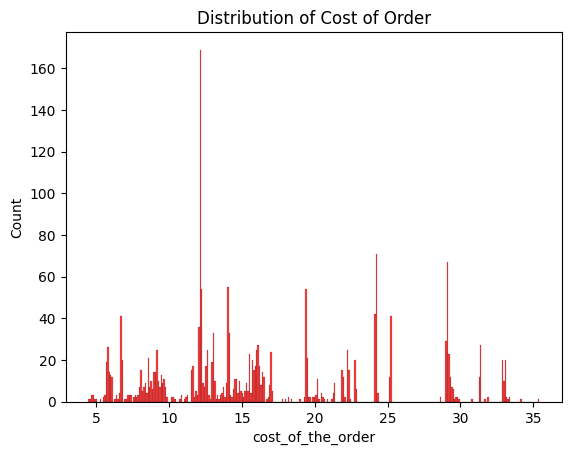

In [56]:
#Distribution of Cost of order sorted
cost_count = df['cost_of_the_order'].value_counts().sort_index()

plt.subplot()
sns.histplot(df['cost_of_the_order'], bins =len(cost_count), color='r')
plt.title('Distribution of Cost of Order')
plt.show()

Text(0.5, 1.0, 'Distribution of Order Ratings')

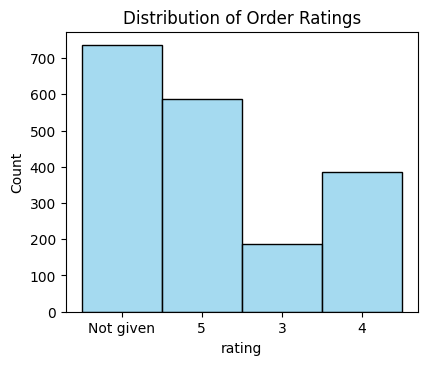

In [57]:
#Distribution of Order Ratings
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['rating'], color='skyblue')#kde =True
plt.title('Distribution of Order Ratings')

Text(0.5, 1.0, 'Distribution of Order Ratings')

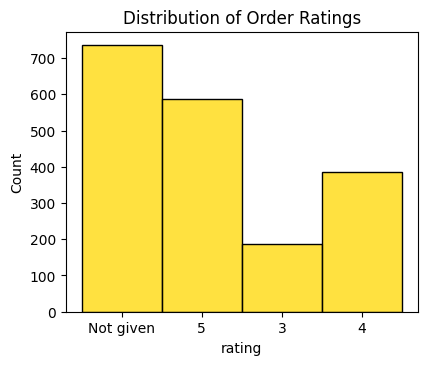

In [58]:
#Distribution of Order Ratings sorted
rate_count = df['rating'].value_counts().sort_index()
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['rating'],bins = len(rate_count), color='gold')#kde =True
plt.title('Distribution of Order Ratings')

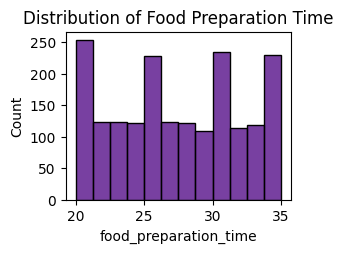

In [59]:
#Distribution for food_preparation
delivery_time_count =df['delivery_time'].value_counts().sort_index()
plt.subplot(2, 2, 3)
sns.histplot(df['food_preparation_time'], color='indigo')
plt.title('Distribution of Food Preparation Time')
plt.show()

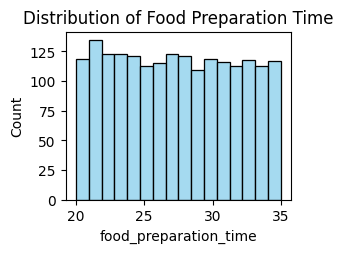

In [60]:
#Distribution for food_preparation sorted
foodprep_time_count =df['food_preparation_time'].value_counts().sort_index()
plt.subplot(2, 2, 3)
sns.histplot(df['food_preparation_time'], bins = len(foodprep_time_count), color='skyblue')
plt.title('Distribution of Food Preparation Time')
plt.show()

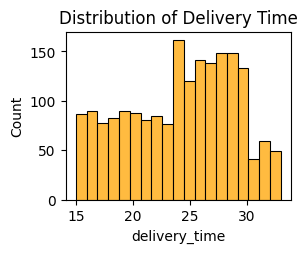

In [61]:
#Distribution of Delivery time
delivery_time_count =df['delivery_time'].value_counts().sort_index()
plt.subplot(2, 2, 4)
sns.histplot(df['delivery_time'], bins = len(delivery_time_count), color='orange')
plt.title('Distribution of Delivery Time')
plt.show()

#Histogram for categorical variables

In [62]:
restaurant_count = df['restaurant_name'].head(100).value_counts()
print(restaurant_count)

Shake Shack                              11
Blue Ribbon Fried Chicken                 9
The Meatball Shop                         6
RedFarm Hudson                            4
TAO                                       4
Cafe Habana                               3
RedFarm Broadway                          3
Five Guys Burgers and Fries               2
The Kati Roll Company                     2
Otto Enoteca Pizzeria                     2
Sushi of Gari 46                          2
Parm                                      2
Blue Ribbon Sushi Izakaya                 2
Tortaria                                  2
Sushi Samba                               2
Chipotle Mexican Grill $1.99 Delivery     2
Cafeteria                                 2
Cafe Mogador                              2
Sarabeth's East                           2
Hill Country Fried Chicken                2
Nobu Next Door                            2
Blue Ribbon Sushi                         2
Benihana                        

In [63]:
# restaurant_count_20 = df[(df['restaurant_name'].value_counts()>50)].reset_index()
# print(restaurant_count)

<ipython-input-64-511b2746b7d9>:20: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


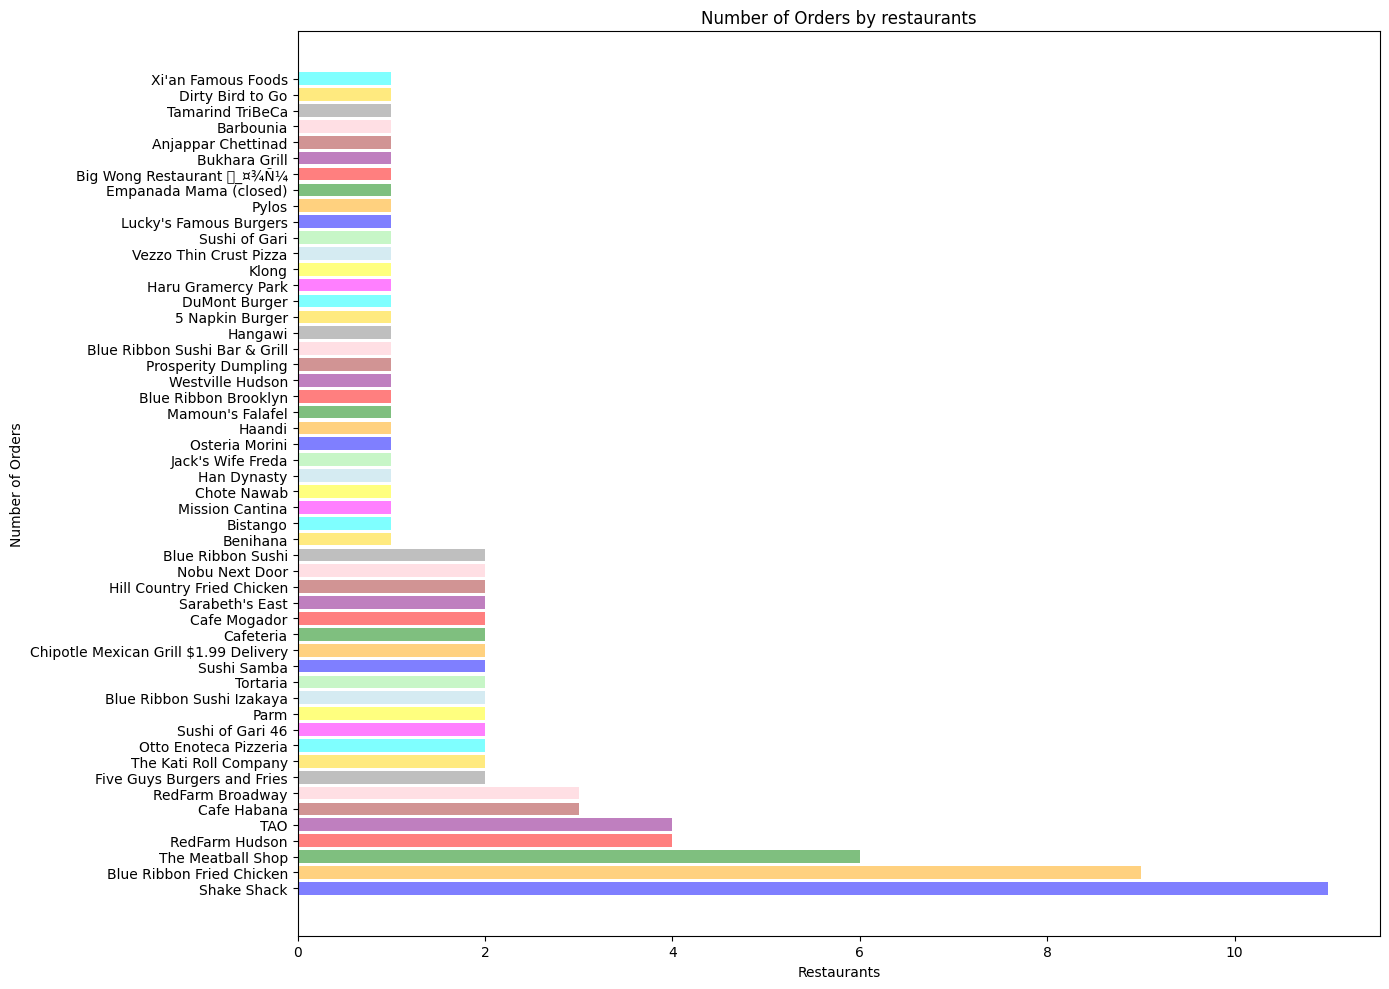

In [64]:
#Distribution of cuisine types using artist method
plt.figure(figsize=(14, 10))
ax = plt.subplot()

plt.subplots_adjust(hspace=1.2)

# Plot horizontal bar chart
bars = ax.barh(restaurant_count.index, restaurant_count.values, color=[
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink',
    'gray', 'gold', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen'
    ], alpha=0.5)

#.plot(kind='bar', color='skyblue')
ax.set_xlabel('Restaurants')
#ax.set_ytick (restaurant_count.values, rotation =45)
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders by restaurants')

# Adjust layout to make subplots fit nicely
plt.tight_layout()

plt.show()

In [65]:
#Count of the various cuisine types
cuisine_count = df['cuisine_type'].value_counts()
print(cuisine_count)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64


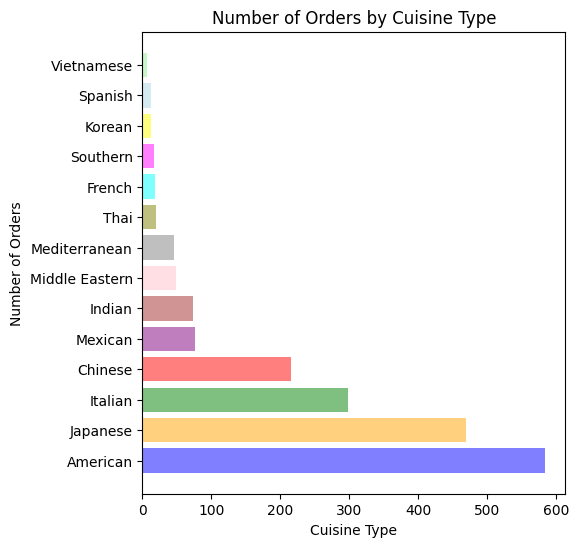

In [66]:
#Distribution of cuisine types using artist method
plt.figure(figsize=(12, 6))
ax = plt.subplot(121)

# Plot horizontal bar chart
bars = ax.barh(cuisine_count.index, cuisine_count.values, color=[
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink',
    'gray', 'olive', 'cyan', 'magenta', 'yellow', 'lightblue', 'lightgreen'
    ], alpha=0.5)

#.plot(kind='bar', color='skyblue')
ax.set_xlabel('Cuisine Type')
ax.set_ylabel('Number of Orders')
ax.set_title('Number of Orders by Cuisine Type')
plt.show()

count          1898
unique            4
top       Not given
freq            736
Name: rating, dtype: object


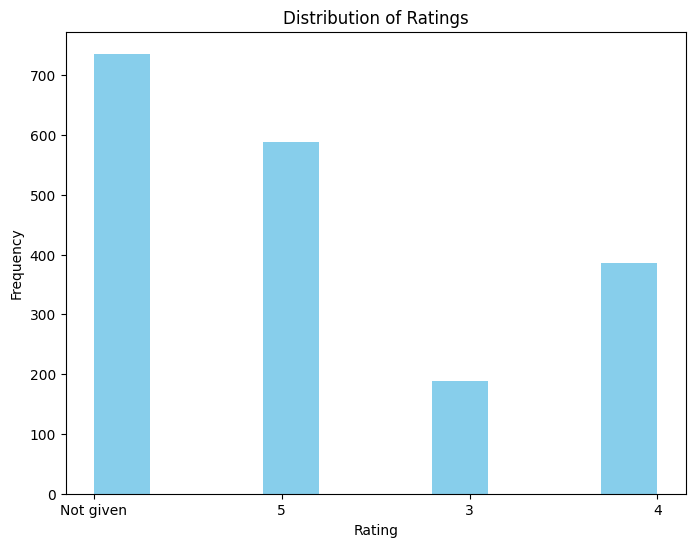

In [67]:
# Check summary statistics of ratings
print(df['rating'].describe())

# Plot a histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['rating'], bins=10, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


In [68]:
day_of_the_week_counts = df['day_of_the_week'].value_counts()
print(day_of_the_week_counts)

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


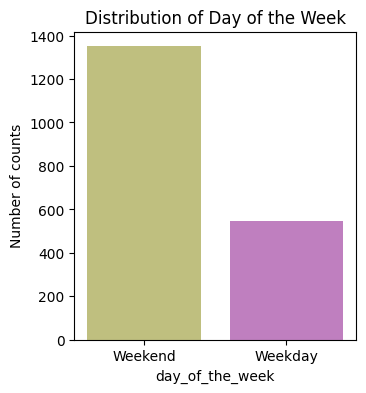

In [69]:
#Distribution of cuisine types using artist method

#Set figure and subplot
plt.figure(figsize=(8, 4))
ax1 = plt.subplot(121)

# Plot horizontal bar chart of day_of_the_week_counts indices on x and the values on y
bars = ax1.bar(day_of_the_week_counts.index, day_of_the_week_counts.values, color=[
     'olive', 'purple' ], alpha=0.5)

ax1.set_xlabel('day_of_the_week')
ax1.set_ylabel('Number of counts')
ax1.set_title('Distribution of Day of the Week')
plt.show()

### **Question 3**: Which are the top 5 restaurants in terms of the number of orders received?

In [70]:
# Grouping the data by restaurant and counting the number of orders
restaurant_orders = df.groupby('restaurant_name')['order_id'].count().reset_index(inplace = False)

# Sorting the restaurants by the number of orders in descending order
restaurants = restaurant_orders.sort_values(by='order_id', ascending=False)

# displaying the top 5 restaurants
top_5_restaurants =restaurants.head()
top_5_restaurants


,restaurant_name,order_id
136,Shake Shack,219
153,The Meatball Shop,132
21,Blue Ribbon Sushi,119
20,Blue Ribbon Fried Chicken,96
109,Parm,68


### **Question 4**: Which is the most popular cuisine on weekends?

In [71]:
#Converting day of the week to one case in order to use it
df['day_of_the_week'] = df['day_of_the_week'].str.lower() #.lower() is a method of the class 'str' hence str.lower()
print(df['day_of_the_week'])

0       weekend
1       weekend
2       weekday
3       weekend
4       weekday
         ...   
1893    weekend
1894    weekend
1895    weekday
1896    weekday
1897    weekend
Name: day_of_the_week, Length: 1898, dtype: object


In [72]:
# Filter the dataset to include only orders placed on weekends
weekends = df[df['day_of_the_week']=='weekend']
#weekends['day_of_the_week']
weekends

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,weekend,5,31,19


In [73]:
# Grouping weekends by cuisine type to get the number of orders for each
popular_cuisine = weekends.groupby('cuisine_type')['order_id'].count().reset_index(inplace =False)
popular_cuisine

,cuisine_type,order_id
0,American,415
1,Chinese,163
2,French,13
3,Indian,49
4,Italian,207
5,Japanese,335
6,Korean,11
7,Mediterranean,32
8,Mexican,53
9,Middle Eastern,32


In [74]:
#get the highest number of orders
most_popular_cuisine =popular_cuisine['order_id'].max()
most_popular_cuisine

415

In [75]:
#get the cuisine type with the highest number of orders
most_popular_cuisine = popular_cuisine[popular_cuisine['order_id'] == popular_cuisine['order_id'].max()]
most_popular_cuisine

,cuisine_type,order_id
0,American,415


#Alternative

In [76]:
weekend1 = df[df['day_of_the_week']=="weekend"]
weekend1

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,weekend,5,31,19


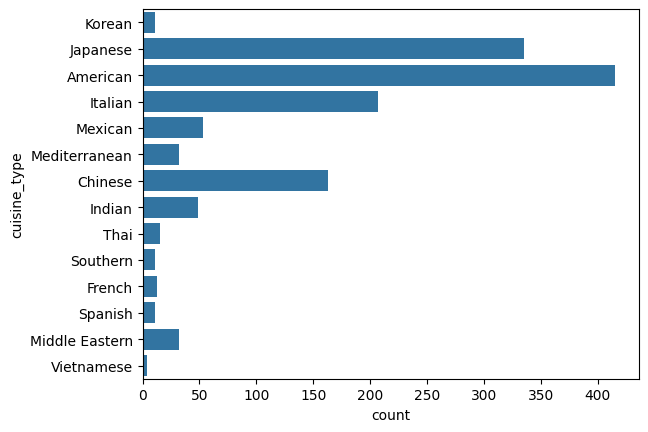

In [77]:
sns.countplot(y=weekend1['cuisine_type'])
plt.show()

### **Question 5**: What percentage of the orders cost more than 20 dollars?

In [78]:
percentage_of_orders = df.groupby('cost_of_the_order')['order_id'].count().reset_index(inplace =False)
percentage_of_orders

,cost_of_the_order,order_id
0,4.47,1
1,4.66,1
2,4.71,1
3,4.75,2
4,4.80,1
...,...,...
307,33.22,1
308,33.32,1
309,33.37,2
310,34.19,1


In [79]:
orders_above_20 = percentage_of_orders[percentage_of_orders['cost_of_the_order']>20]
orders_above_20

,cost_of_the_order,order_id
239,20.13,3
240,20.18,6
241,20.23,5
242,20.32,1
243,20.47,2
...,...,...
307,33.22,1
308,33.32,1
309,33.37,2
310,34.19,1


In [80]:
orders_above_20_len = df[df['cost_of_the_order'] > 20].shape[0]
orders_above_20_len

555

In [81]:
total_orders_df = (df['order_id']).shape[0]
total_orders_df

1898

In [82]:
percentage_of_orders_above_20 = (orders_above_20_len/total_orders_df)*100
print(percentage_of_orders_above_20,"%")

29.24130663856691 %


#Pie Chart

In [83]:
orders_above_20_len  = df[df['cost_of_the_order'] > 20].shape[0]
orders_above_20_len

555

In [84]:
orders_less_20 = df[df['cost_of_the_order'] <= 20].shape[0]
orders_less_20

1343

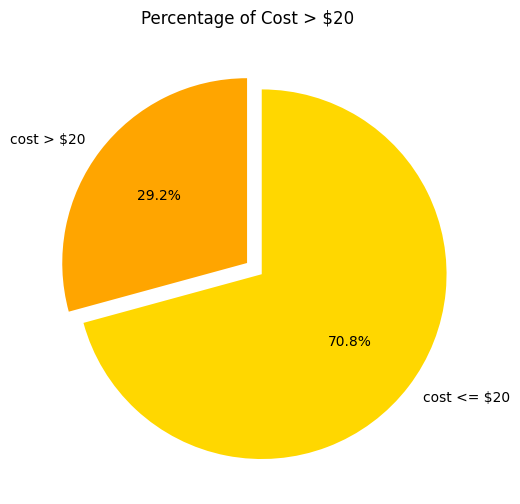

In [85]:
sizes = [orders_above_20_len,orders_less_20]
labels =['cost > $20', 'cost <= $20']
colors =['orange','gold']
#explode the first slice (cost >20$)
explode_list = [0, 0.1]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels,explode = explode_list, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Percentage of Cost > $20")
plt.show()

### **Question 6**: What is the mean order delivery time?

In [86]:
delivery_of_orders = df.groupby('delivery_time')['order_id'].count().reset_index(inplace =False)
delivery_of_orders

,delivery_time,order_id
0,15,87
1,16,90
2,17,78
3,18,83
4,19,90
5,20,88
6,21,81
7,22,85
8,23,77
9,24,162


In [87]:
delivery_of_orders_mean = df.groupby('delivery_time')['order_id'].count().reset_index(inplace =False).mean()
delivery_of_orders_mean

delivery_time    24.000000
order_id         99.894737
dtype: float64

In [88]:
mean_order_delivery_time = df['delivery_time'].mean()
mean_order_delivery_time

24.161749209694417

### **Question 7:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [89]:
#Finding the top 3 most frequent customers

# Grouping  by customer ID and count the number of orders for each customer
customer_counts = df.groupby('customer_id')['order_id'].count().reset_index(inplace=False)
customer_counts

,customer_id,order_id
0,1311,1
1,5139,1
2,5444,1
3,5693,1
4,6987,2
...,...,...
1195,402215,1
1196,403019,1
1197,403833,1
1198,404649,1


In [90]:
# Sorting the customers by theorder_id counts in descending order
sort_customers = customer_counts.sort_values(by='order_id', ascending=False)
sort_customers

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9
839,250494,8
216,65009,7
...,...,...
478,105903,1
479,105992,1
480,106006,1
481,106324,1


In [91]:
# Displaying the top 3 most frequent customers and the number of orders they placed from sort_customers
top_3_most_freq_customers = sort_customers.head(3)
top_3_most_freq_customers

,customer_id,order_id
116,52832,13
84,47440,10
333,83287,9


## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


#Using Box plot

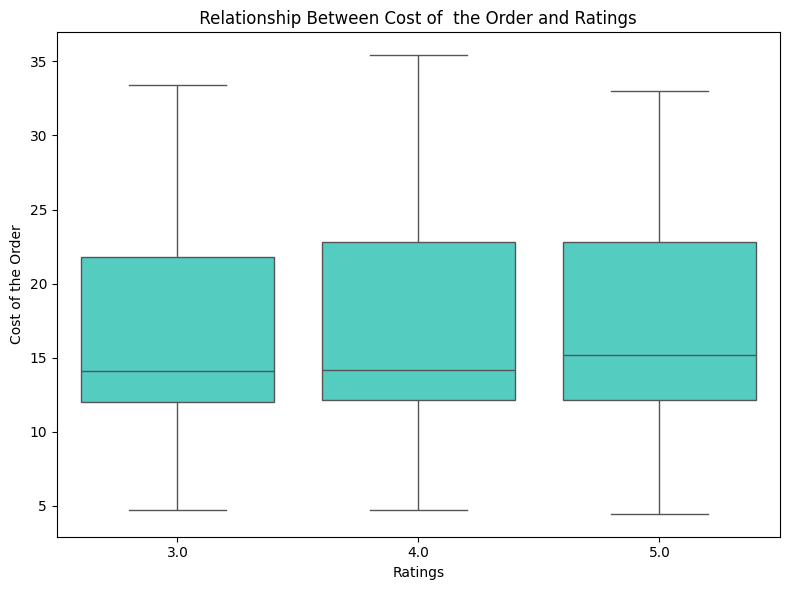

In [148]:
# Important variables include ratings, cost of order, food preparation time and delivery time to know ,the demands of the restaurants to improve sales.
# Scatter plot for 'cost_of_the_order' against  'rating'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='rating', y='cost_of_the_order', color='turquoise')
plt.title(' Relationship Between Cost of  the Order and Ratings ')
plt.xlabel('Ratings')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()


In [149]:
restaurant_rate1 = df.groupby('restaurant_name')['rating'].mean().reset_index\
(drop =False, inplace = False).sort_values(by ='rating', ascending = False)
restaurant_rate1.head()

,restaurant_name,rating
0,'wichcraft,5.0
120,Ravagh Persian Grill,5.0
37,Chola Eclectic Indian Cuisine,5.0
38,Chote Nawab,5.0
82,Junoon,5.0


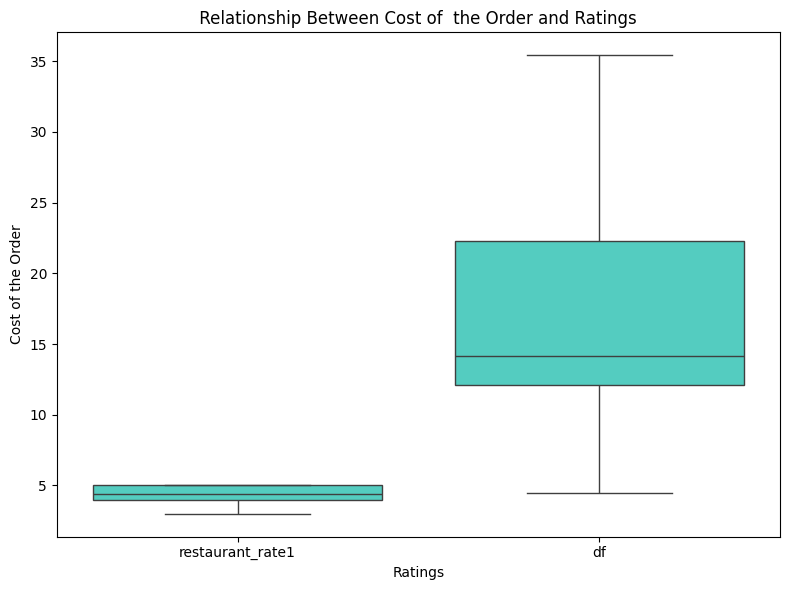

In [152]:
# Important variables include ratings, cost of order, food preparation time and delivery time to know ,the demands of the restaurants to improve sales.
# Scatter plot for 'cost_of_the_order' against  'rating'
plt.figure(figsize=(8, 6))
#setting data for box plot
merged_df = pd.concat([restaurant_rate1['rating'], df['cost_of_the_order']], axis=1)

  # Renaming the columns
merged_df.columns = ['restaurant_rate1', 'df']

# Plot boxplot
sns.boxplot(data=merged_df, color='turquoise')
plt.title(' Relationship Between Cost of  the Order and Ratings ')
plt.xlabel('Ratings')
plt.ylabel('Cost of the Order')
plt.tight_layout()
plt.show()


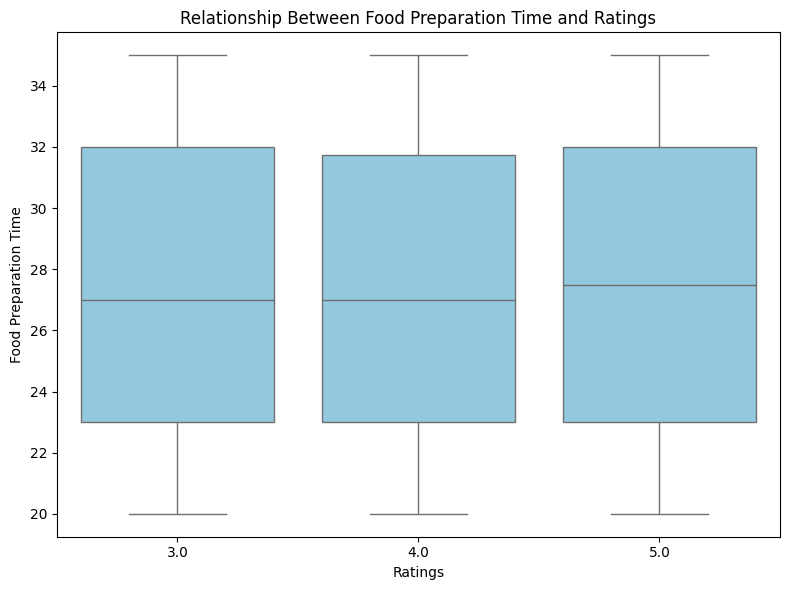

In [154]:
# Scatter plot for 'ratings' and 'food_preparation_time'
plt.figure(figsize=(8, 6))
sns.boxplot(data = df, x = 'rating', y = 'food_preparation_time', color='skyblue')
plt.title('Relationship Between Food Preparation Time and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Food Preparation Time')
plt.tight_layout()
plt.show()

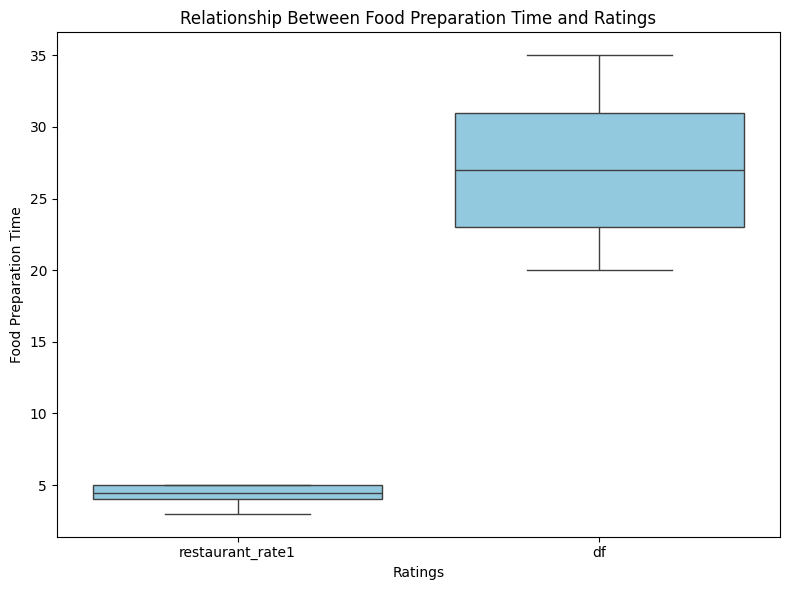

In [155]:
# Scatter plot for 'ratings' and 'food_preparation_time'
plt.figure(figsize=(8, 6))

#setting data for box plot
merged_df2 = pd.concat([restaurant_rate1['rating'], df['food_preparation_time']], axis=1)

  # Renaming the columns
merged_df2.columns = ['restaurant_rate1', 'df']

sns.boxplot(data = merged_df2, color='skyblue')
plt.title('Relationship Between Food Preparation Time and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Food Preparation Time')
plt.tight_layout()
plt.show()

In [137]:
# Replace 'Not given' with NaN
df['rating'] = df['rating'].replace('Not given', np.nan)

# Convert string ratings to numerical values
df['rating'] = pd.to_numeric(df['rating'])

<ipython-input-143-3384c7e99084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='food_preparation_time', data=df, ax=axes[0], palette='Blues')
<ipython-input-143-3384c7e99084>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='delivery_time', data=df, ax=axes[1], palette='Reds')
<ipython-input-143-3384c7e99084>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='rating', x='cuisine_type', data=df, ax=axes[2], palette='Greens')


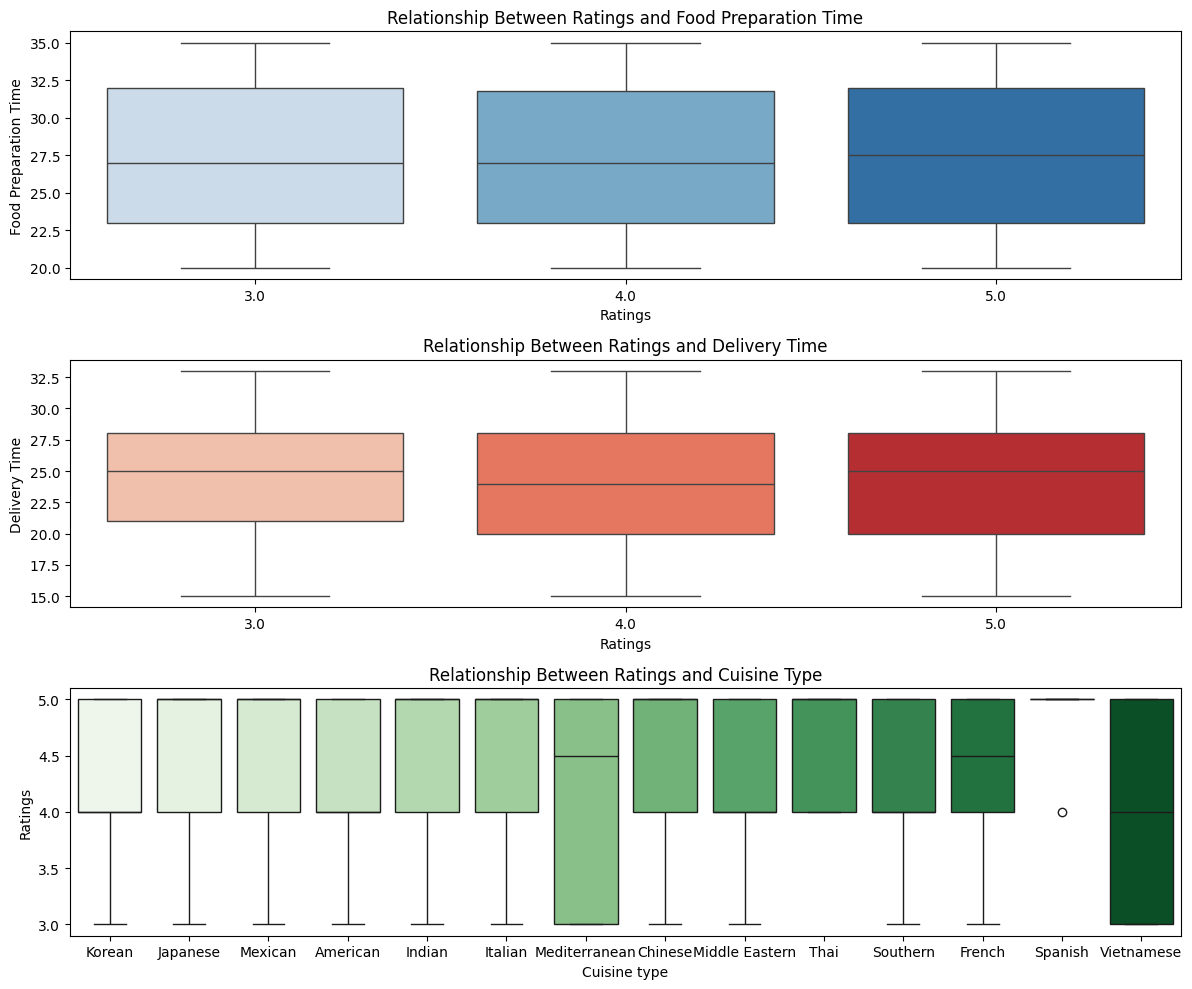

In [143]:
#Creating subplots for each box plot
figure, axes = plt.subplots(3,1,figsize = (12,10))

# Adjust the horizontal space between subplots to avoid overlap of xlabels
plt.subplots_adjust(hspace=0.5)

#Box plot for ratings and food preparation time
sns.boxplot(x='rating', y='food_preparation_time', data=df, ax=axes[0], palette='Blues')
axes[0].set_title('Relationship Between Ratings and Food Preparation Time')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Food Preparation Time')

#Box plot for ratings and delivery time
sns.boxplot(x='rating', y='delivery_time', data=df, ax=axes[1], palette='Reds')
axes[1].set_title('Relationship Between Ratings and Delivery Time')
axes[1].set_xlabel('Ratings')
axes[1].set_ylabel('Delivery Time')

#Box plot for ratings and cuisine_type
sns.boxplot(y='rating', x='cuisine_type', data=df, ax=axes[2], palette='Greens')
axes[2].set_title('Relationship Between Ratings and Cuisine Type')
axes[2].set_ylabel('Ratings')
axes[2].set_xlabel('Cuisine type')

plt.tight_layout()
plt.show()

In [175]:
#Unique restaurants
unique_restaurant= df['restaurant_name'].unique()

unique_df = pd.DataFrame(unique_restaurant, columns=['restaurant_name'])
unique_df

,restaurant_name
0,Hangawi
1,Blue Ribbon Sushi Izakaya
2,Cafe Habana
3,Blue Ribbon Fried Chicken
4,Dirty Bird to Go
...,...
173,Rye House
174,Hiroko's Place
175,Frank Restaurant
176,Sarabeth's West


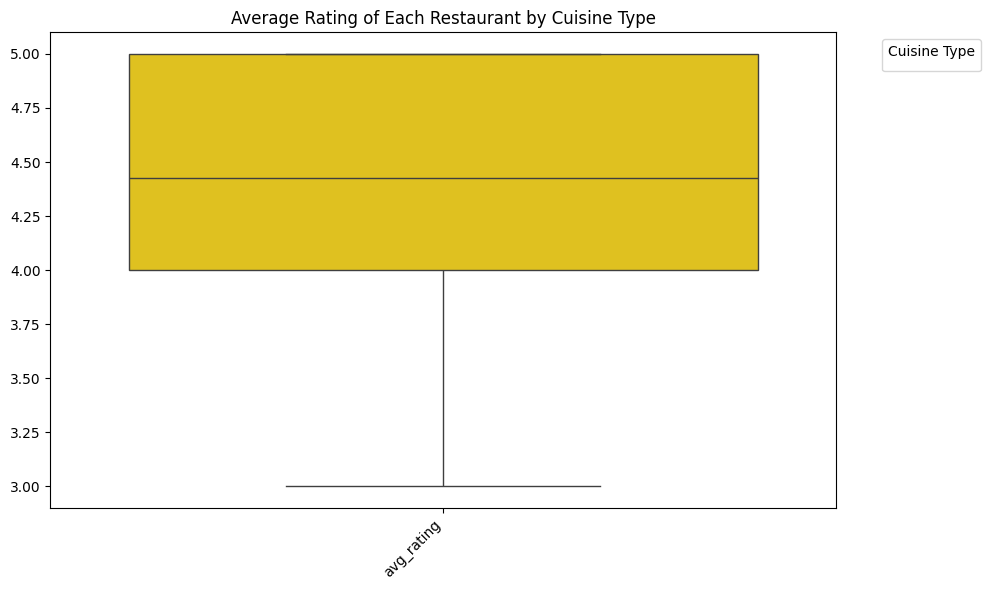

In [179]:
#setting data for box plot
merged_df4 = pd.concat([unique_df['restaurant_name'],restaurant_rate1['rating']], axis=1)

  # Renaming the columns
merged_df4.columns = ['restaurants', 'avg_rating']

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df4, color ='gold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Average Rating of Each Restaurant by Cuisine Type')
plt.legend(title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()


<ipython-input-212-7d7fb597e2be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurant_ratings, x='restaurant_name', y='rating',  palette='muted')


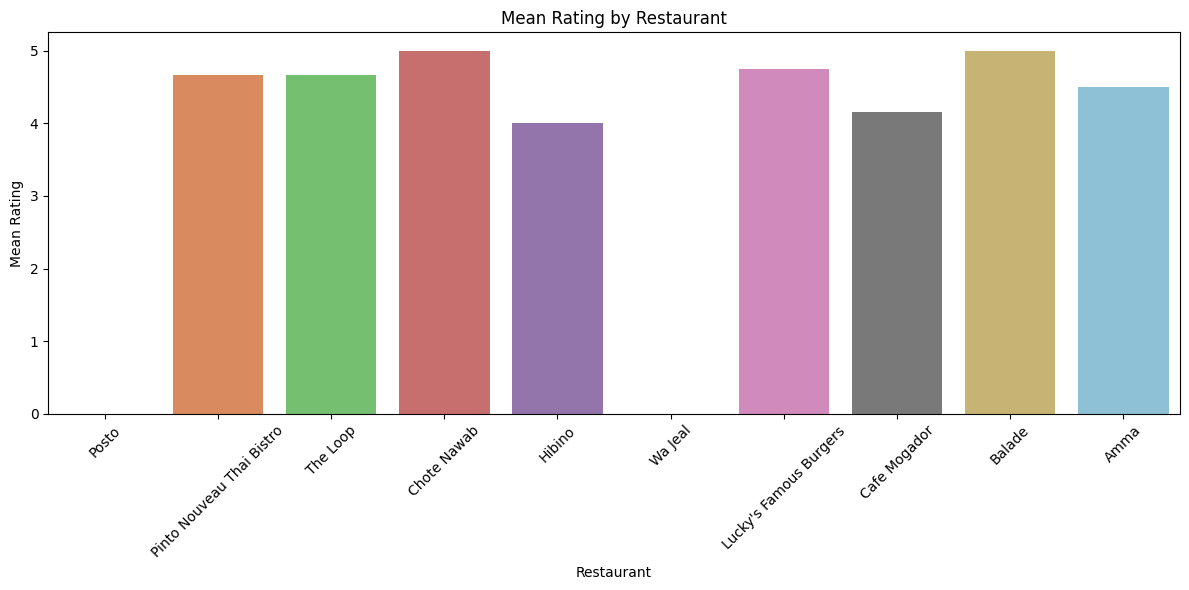

In [212]:
#Calculate the mean rating for each restaurant
restaurant_ratings = df.groupby('restaurant_name')['rating'].mean().reset_index().sample (10)

# Plot the relationship between cuisine type and mean rating
plt.figure(figsize=(12, 6))
sns.barplot(data=restaurant_ratings, x='restaurant_name', y='rating',  palette='muted')

# sns.barplot(data=df, x='Category', y='Values')

# # Add text labels to each bar
# for index, row in df.iterrows():
#     plt.text(index, row['Values'], str(row['Values']), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.xlabel('Restaurant')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Restaurant')
plt.tight_layout()
plt.show()


<ipython-input-192-608917360ce0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_ratings, x='cuisine_type', y='rating', palette='muted')


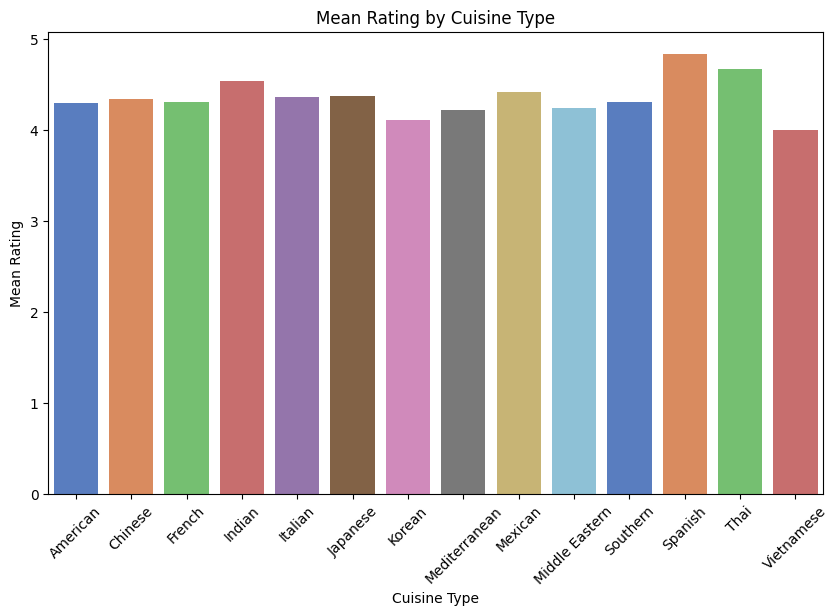

In [192]:
# Calculate the mean rating for each cuisine type
cuisine_ratings = df.groupby('cuisine_type')['rating'].mean().reset_index()

# Plot the relationship between cuisine type and mean rating
plt.figure(figsize=(10, 6))
sns.barplot(data=cuisine_ratings, x='cuisine_type', y='rating', palette='muted')
plt.xticks(rotation=45)
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Cuisine Type')
plt.show()

#Restaurants with the lowest ratings

In [102]:
# Sort the DataFrame by rating in ascending order
lowest_rated_restaurants = df.sort_values(by='rating')

# Print the top few rows with the lowest ratings
print("Restaurants with the lowest ratings:")
print(lowest_rated_restaurants[['restaurant_name', 'rating']].head())


Restaurants with the lowest ratings:
                restaurant_name rating
1580               Burger Joint      3
274        Blue Ribbon Brooklyn      3
275               P.J. Clarke's      3
1046                        TAO      3
1495  Blue Ribbon Sushi Izakaya      3


In [104]:
# Group the DataFrame by cuisine type
lowest_rated_by_cuisine = df.groupby('cuisine_type')['rating'].idxmin()
# Get index of lowest rated restaurant for each cuisine type
lowest_rated_restaurants = df.loc[lowest_rated_by_cuisine, ['cuisine_type', 'restaurant_name', 'rating']]

# Plot the lowest rated restaurant by the cuisine type [try by the rating]
plt.figure(figsize=(12, 6))
sns.barplot(data=lowest_rated_restaurants, x='cuisine_type', y='rating', hue='restaurant_name', dodge=False)
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.title('Lowest Rated Restaurants')
plt.xticks(rotation=45)
plt.legend(title='Restaurant Name', bbox_to_anchor=(1.05, 1))# sets the position of the legend outside the axes, at the upper-right corner to avoid overlapping with the plot.
plt.tight_layout()
plt.show()



#Groupby cuisine_type and order_id

In [106]:
# # Group the DataFrame by cuisine type and order ID
# grouped = df.groupby(['cuisine_type', 'order_id'])

# # Calculate the mean rating for each group
# mean_rating_by_cuisine_order = grouped['rating'].mean()

# #Print the mean rating for each group
# print(mean_rating_by_cuisine_order)


In [108]:
# # Group the DataFrame by cuisine type and order ID
# grouped = df.groupby(['cuisine_type', 'order_id'])

# # Calculate the mean rating for each group
# mean_rating = grouped['rating'].mean().reset_index()

# # Plot box plots of ratings for each cuisine type and order_id
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=mean_rating, x='cuisine_type', y='rating')
# plt.xlabel('Cuisine Type')
# plt.ylabel('Rating')
# plt.title('Distribution of Ratings by Cuisine Type and Order ID')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


### **Question 9:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [127]:
# Convert the values in the rating columns to floats/numbers
# use errors="coerce" to change all values which cannot be converted to null values
df['rating'] = pd.to_numeric(df['rating'], errors="coerce")
df['rating']

# Group every restaurant name with their mean ratings
restaurant_rate1 = df.groupby('restaurant_name')['rating'].mean().reset_index\
(drop =False, inplace = False).sort_values(by ='rating', ascending = False)
restaurant_rate1.head()


#Find restaurants with ratings above 4
above_4 = restaurant_rate1[restaurant_rate1['rating']>4]
above_4


#group restaurant names with their number of ratings
restaurant_rated = df.groupby('restaurant_name')['rating'].count().reset_index\
(drop =False, inplace = False).sort_values(by ='rating', ascending = False)
restaurant_rated.head()

above_50 = restaurant_rated[restaurant_rated['rating']>50]
above_50

#Find restaurants with both mean rating >4 and rating counts > 50
promo_restaurants = pd.merge(above_4,above_50,how='inner',on=['restaurant_name'])
promo_restaurants

,restaurant_name,rating_x,rating_y
0,The Meatball Shop,4.511905,84
1,Blue Ribbon Fried Chicken,4.328125,64
2,Shake Shack,4.278195,133
3,Blue Ribbon Sushi,4.219178,73


### **Question 10:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#Revenue for 25% (0.25) 0f cost of the order >20
revenue_25 =df[df['cost_of_the_order']>20]
#multiplying the sum of orders in the category above by 0.25 to get the 25% revenue
revenue1 = revenue_25['cost_of_the_order'].sum()*0.25
print(revenue_25)
print('$',revenue1)

In [ ]:
#Revenue for 15% (0.15) 0f cost of the order >5 and < or = 20
revenue_15 =(df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)] )
#multiplying the sum of orders in the category above by 0.15 to get the 15% revenue
revenue2 = revenue_15['cost_of_the_order'].sum()*0.15
print(revenue_15)
print('$',revenue2)

In [ ]:
net_revenue = revenue1 + revenue2
print('The net revenue generated by the company across all orders is $',net_revenue)

### **Question 11:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
df['total_time_from_prep_to_delivery'] = df['food_preparation_time'] + df['delivery_time']

orders_60_above =df[df['total_time_from_prep_to_delivery'] > 60]
orders_60_above

In [ ]:
percentage = (df['total_time_from_prep_to_delivery']>60).mean()*100
print(percentage,'%')

### **Question 12:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Groupby 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_time



## Conclusion and Recommendations

### **Question 13:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
*  

### Recommendations:

*  

---